<a href="https://colab.research.google.com/github/aunraza19/ANN-Lab-Tasks/blob/main/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cuda


100%|██████████| 9.91M/9.91M [00:02<00:00, 4.61MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.14MB/s]


Epoch [1/10], Loss: 364.7848, Accuracy: 93.54%
Epoch [2/10], Loss: 173.1536, Accuracy: 95.77%
Epoch [3/10], Loss: 120.8971, Accuracy: 96.45%
Epoch [4/10], Loss: 99.8479, Accuracy: 96.95%
Epoch [5/10], Loss: 86.5732, Accuracy: 97.05%
Epoch [6/10], Loss: 72.2741, Accuracy: 97.00%
Epoch [7/10], Loss: 66.1104, Accuracy: 97.24%
Epoch [8/10], Loss: 58.7100, Accuracy: 97.16%
Epoch [9/10], Loss: 53.6823, Accuracy: 97.21%
Epoch [10/10], Loss: 48.1155, Accuracy: 97.20%


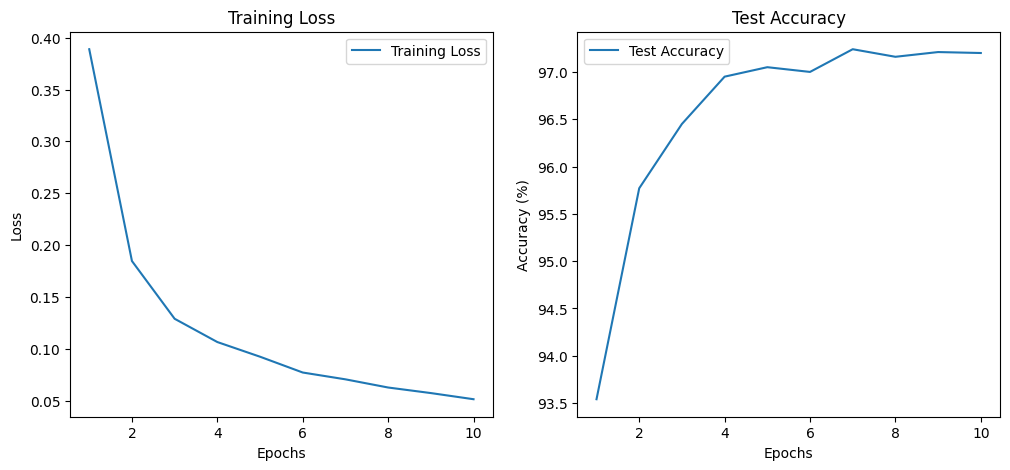

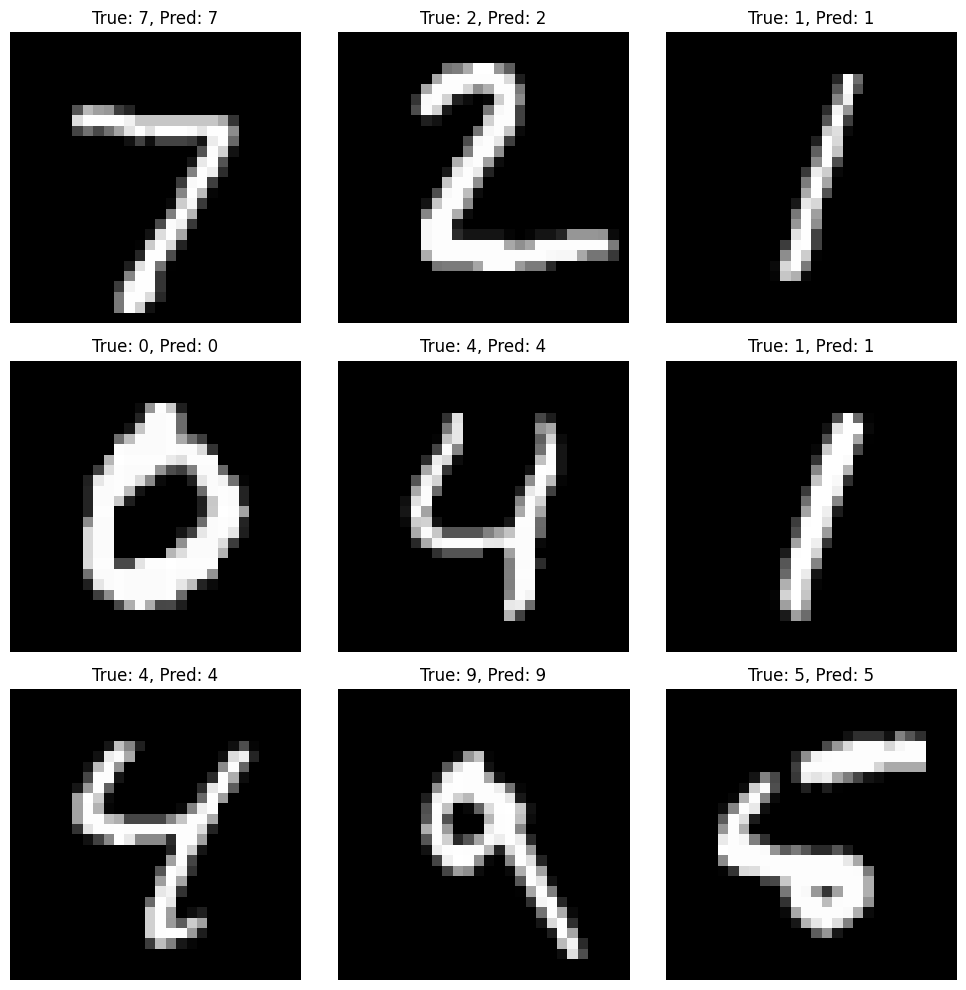

In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Set device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(128, 64)    # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(64, 10)     # Second hidden layer to output layer
        self.relu = nn.ReLU()            # Activation function
        self.softmax = nn.Softmax(dim=1) # Output activation (for classification)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))

    # Evaluate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Visualize loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.legend()
plt.show()
# Visualize predictions
def visualize_predictions():
    model.eval()
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].cpu().numpy().squeeze(), cmap='gray')
        plt.title(f"True: {labels[i].item()}, Pred: {predicted[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
visualize_predictions()


Epoch [1/10], Loss: 247.7983, Accuracy: 89.17%
Epoch [2/10], Loss: 220.0869, Accuracy: 93.58%
Epoch [3/10], Loss: 211.9010, Accuracy: 94.40%
Epoch [4/10], Loss: 202.1036, Accuracy: 94.55%
Epoch [5/10], Loss: 198.2491, Accuracy: 93.63%
Epoch [6/10], Loss: 190.4434, Accuracy: 95.37%
Epoch [7/10], Loss: 183.1223, Accuracy: 95.32%
Epoch [8/10], Loss: 194.4709, Accuracy: 94.74%
Epoch [9/10], Loss: 173.3763, Accuracy: 95.11%
Epoch [10/10], Loss: 174.0482, Accuracy: 95.14%


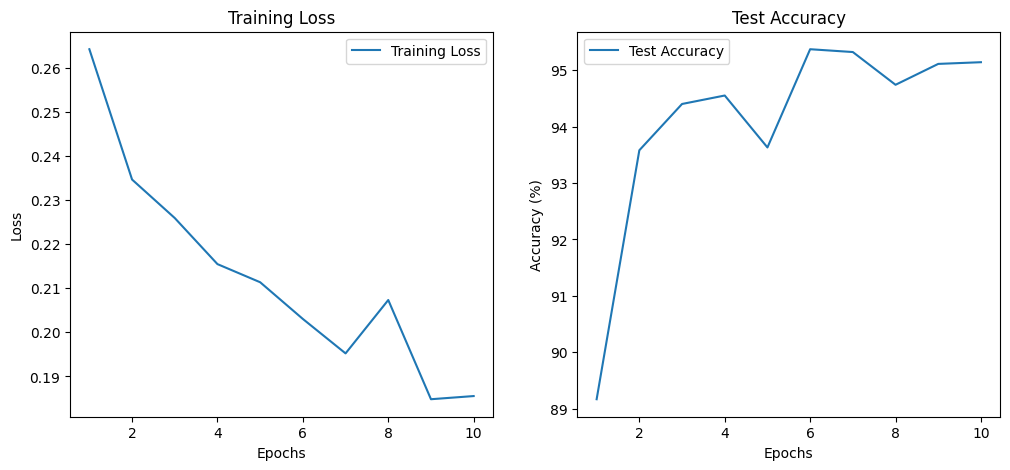

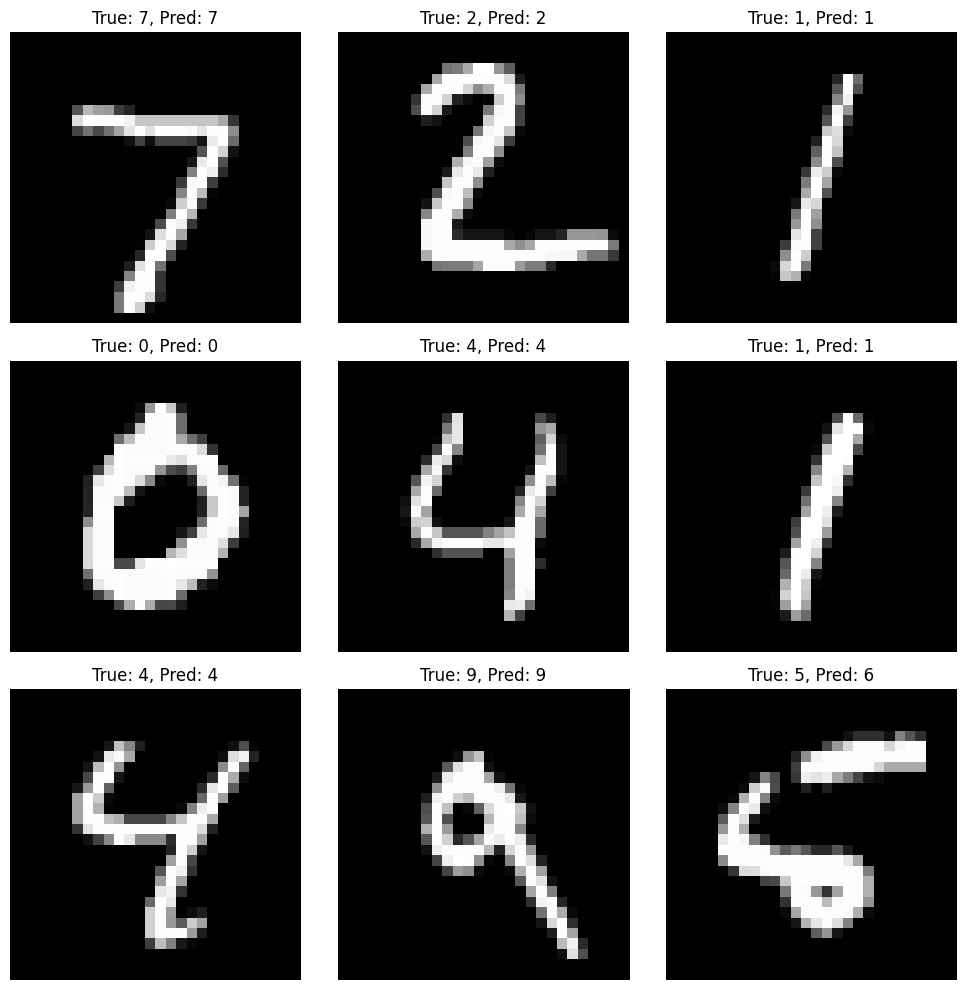

In [2]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
num_epochs = 10
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))

    # Evaluate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Visualize loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.legend()
plt.show()
# Visualize predictions
def visualize_predictions():
    model.eval()
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].cpu().numpy().squeeze(), cmap='gray')
        plt.title(f"True: {labels[i].item()}, Pred: {predicted[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
visualize_predictions()


Epoch [1/10], Loss: 635.0894, Accuracy: 94.28%
Epoch [2/10], Loss: 313.1152, Accuracy: 95.97%
Epoch [3/10], Loss: 236.4311, Accuracy: 96.13%
Epoch [4/10], Loss: 197.6752, Accuracy: 96.93%
Epoch [5/10], Loss: 168.6564, Accuracy: 96.68%
Epoch [6/10], Loss: 147.9149, Accuracy: 96.71%
Epoch [7/10], Loss: 139.0595, Accuracy: 97.05%
Epoch [8/10], Loss: 123.5033, Accuracy: 97.28%
Epoch [9/10], Loss: 113.8858, Accuracy: 97.43%
Epoch [10/10], Loss: 100.0290, Accuracy: 96.87%


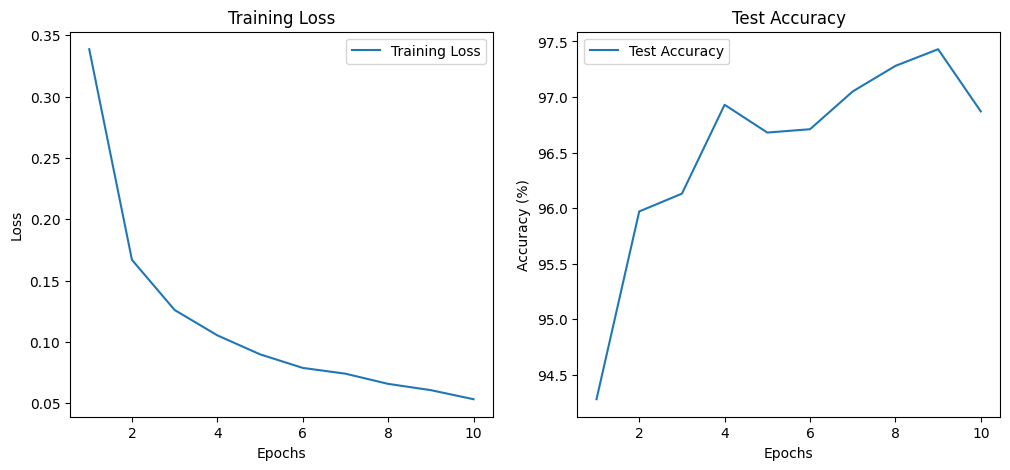

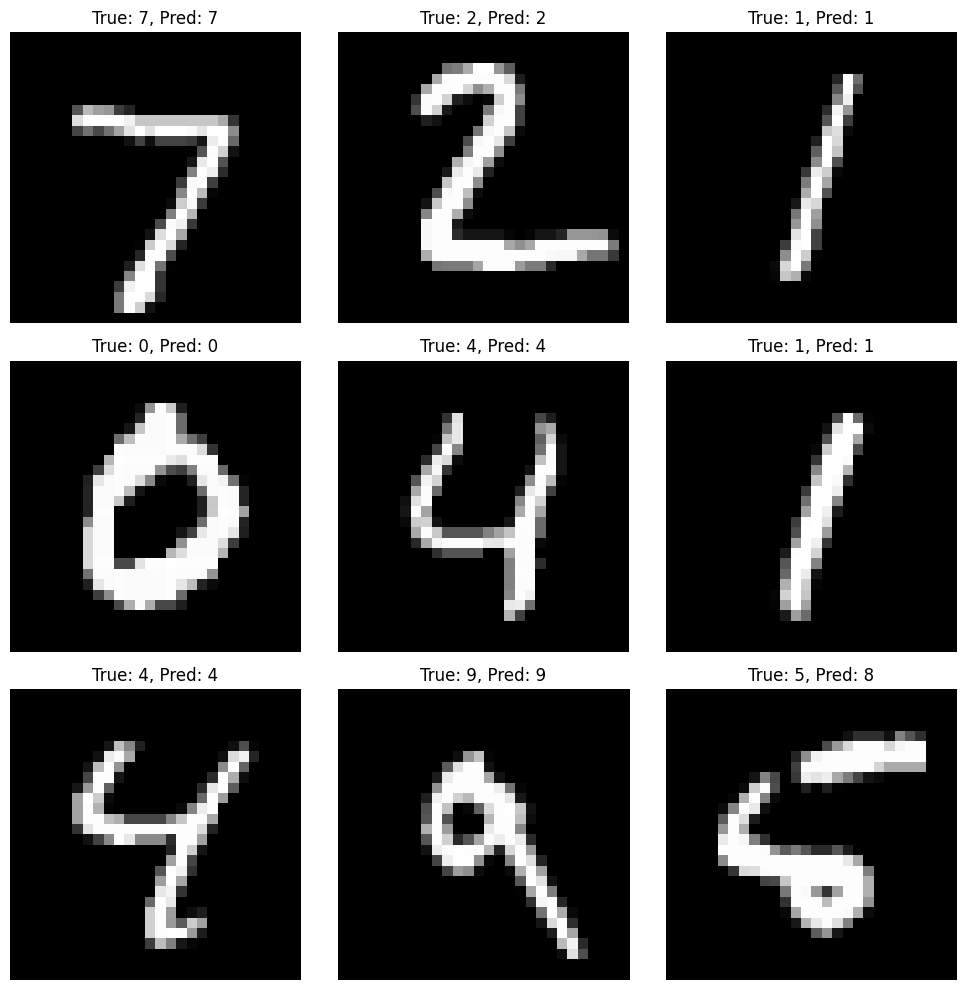

In [3]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(128, 64)    # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(64, 10)     # Second hidden layer to output layer
        self.relu = nn.ReLU()            # Activation function
        self.softmax = nn.Softmax(dim=1) # Output activation (for classification)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))

    # Evaluate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Visualize loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.legend()
plt.show()
# Visualize predictions
def visualize_predictions():
    model.eval()
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].cpu().numpy().squeeze(), cmap='gray')
        plt.title(f"True: {labels[i].item()}, Pred: {predicted[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
visualize_predictions()


In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features: 4 (sepal/petal length/width)
y = iris.target.reshape(-1, 1)  # Labels: 0, 1, 2

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode target labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # for stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Neural network parameters
input_size = 4
hidden_size = 6
output_size = 3
learning_rate = 0.1
epochs = 1000

# Weight and bias initialization
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Training using backpropagation
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X_train, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)  # output

    # Loss (cross-entropy)
    loss = -np.mean(np.sum(y_train * np.log(a2 + 1e-8), axis=1))

    # Backpropagation
    dz2 = a2 - y_train
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(z1)
    dW1 = np.dot(X_train.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if (epoch + 1) % 100 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f}")

# Evaluation
def predict(X):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    return np.argmax(a2, axis=1)

y_pred = predict(X_test)
y_true = np.argmax(y_test, axis=1)
accuracy = np.mean(y_pred == y_true)

print(f"\nTest Accuracy: {accuracy * 100:.2f}%")


Epoch 1/1000 - Loss: 1.3721
Epoch 100/1000 - Loss: 0.0659
Epoch 200/1000 - Loss: 0.0586
Epoch 300/1000 - Loss: 0.0551
Epoch 400/1000 - Loss: 0.0523
Epoch 500/1000 - Loss: 0.0455
Epoch 600/1000 - Loss: 0.0397
Epoch 700/1000 - Loss: 0.0353
Epoch 800/1000 - Loss: 0.0316
Epoch 900/1000 - Loss: 0.0285
Epoch 1000/1000 - Loss: 0.0258

Test Accuracy: 100.00%


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Activation Function: logistic
Train Accuracy: 0.8417
Test Accuracy:  0.8667

Activation Function: relu
Train Accuracy: 0.8417
Test Accuracy:  0.8333


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Activation Function: tanh
Train Accuracy: 0.8583
Test Accuracy:  0.8667


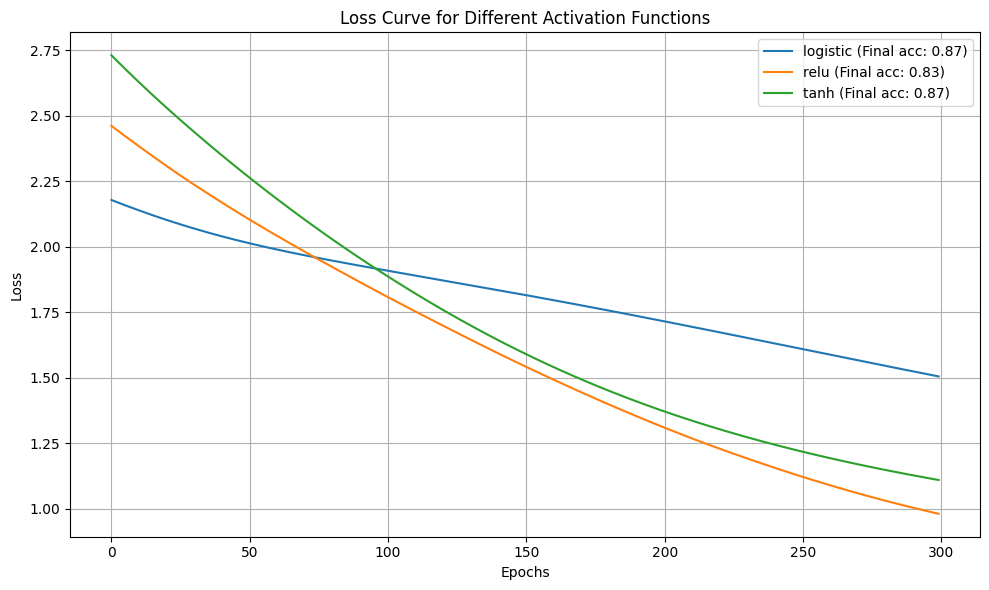

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss

# Load Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# Preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Activation functions to compare
activations = ['logistic', 'relu', 'tanh']  # 'logistic' = sigmoid

results = {}

for activation in activations:
    clf = MLPClassifier(hidden_layer_sizes=(10,), activation=activation, max_iter=300, random_state=42)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict_proba(X_train)
    y_test_pred = clf.predict_proba(X_test)

    train_acc = accuracy_score(np.argmax(y_train, axis=1), np.argmax(y_train_pred, axis=1))
    test_acc = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1))
    loss = clf.loss_curve_

    results[activation] = {
        'train_acc': train_acc,
        'test_acc': test_acc,
        'loss': loss
    }

    print(f"\nActivation Function: {activation}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:  {test_acc:.4f}")

# Visualization of Loss Curve
plt.figure(figsize=(10, 6))
for activation in activations:
    plt.plot(results[activation]['loss'], label=f"{activation} (Final acc: {results[activation]['test_acc']:.2f})")
plt.title("Loss Curve for Different Activation Functions")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
